# Spotify Analysis 2025 Dataset

https://www.kaggle.com/datasets/nabihazahid/spotify-dataset-for-churn-analysis

In [ ]:
#Group Name: Robert & Shadmun
#Class: COSC 6315
#Professor: Dr. Hardik Gohel, Ph.D.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub


In [ ]:
path = kagglehub.dataset_download("nabihazahid/spotify-dataset-for-churn-analysis")
df = pd.read_csv(f"{path}/spotify_churn_dataset.csv")
print(df)

df = df.astype({
    "user_id": "str",
    "gender": "category",
    "country": "category",
    "subscription_type": "category",
    "device_type": "category",
    "offline_listening": "bool",
    "is_churned": "bool"
})

100%|██████████| 96.8k/96.8k [00:00<00:00, 406kB/s]

Extracting files...
      user_id  gender  age country subscription_type  listening_time  \
0           1  Female   54      CA              Free              26   
1           2   Other   33      DE            Family             141   
2           3    Male   38      AU           Premium             199   
3           4  Female   22      CA           Student              36   
4           5   Other   29      US            Family             250   
...       ...     ...  ...     ...               ...             ...   
7995     7996   Other   44      DE           Student             237   
7996     7997    Male   34      AU           Premium              61   
7997     7998  Female   17      US              Free              81   
7998     7999  Female   34      IN           Student             245   
7999     8000   Other   45      AU              Free             210   

      songs_played_per_day  skip_rate device_type  ads_listened_per_week  \
0                       23       0.20  

In [ ]:
df.isnull().sum() #missing values (can also use .isna)

,0
user_id,0
gender,0
age,0
country,0
subscription_type,0
listening_time,0
songs_played_per_day,0
skip_rate,0
device_type,0
ads_listened_per_week,0


               age  listening_time  songs_played_per_day    skip_rate  \
count  8000.000000     8000.000000           8000.000000  8000.000000   
mean     37.662125      154.068250             50.127250     0.300127   
std      12.740359       84.015596             28.449762     0.173594   
min      16.000000       10.000000              1.000000     0.000000   
25%      26.000000       81.000000             25.000000     0.150000   
50%      38.000000      154.000000             50.000000     0.300000   
75%      49.000000      227.000000             75.000000     0.450000   
max      59.000000      299.000000             99.000000     0.600000   

       ads_listened_per_week  
count            8000.000000  
mean                6.943875  
std                13.617953  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 5.000000  
max                49.000000  


<Axes: xlabel='is_churned'>

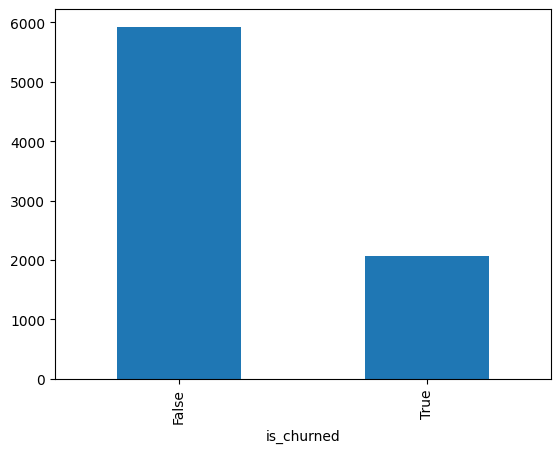

In [ ]:
# Descriptive statistics
print(df.describe())
df['is_churned'].value_counts().plot(kind='bar')



In [ ]:
df.info()
df['is_churned'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   user_id                8000 non-null   object  
 1   gender                 8000 non-null   category
 2   age                    8000 non-null   int64   
 3   country                8000 non-null   category
 4   subscription_type      8000 non-null   category
 5   listening_time         8000 non-null   int64   
 6   songs_played_per_day   8000 non-null   int64   
 7   skip_rate              8000 non-null   float64 
 8   device_type            8000 non-null   category
 9   ads_listened_per_week  8000 non-null   int64   
 10  offline_listening      8000 non-null   bool    
 11  is_churned             8000 non-null   bool    
dtypes: bool(2), category(4), float64(1), int64(4), object(1)
memory usage: 422.8+ KB


,count
is_churned,
False,5929
True,2071


In [ ]:
total = 8000.0

print(f"Mean songs skipped: {df['skip_rate'].mean()}")
print(f"Mean ads listend to per week: {df['ads_listened_per_week'].mean()}")
print(f"Mean songs played per day: {df['songs_played_per_day'].mean()}")
print(f"Mean listening time: {df['listening_time'].mean()}")

free_users = 0
premium_users = 0
student_users = 0
family_users = 0
for subscription in df['subscription_type']:
  if subscription == 'Free':
    free_users = free_users + 1
  elif subscription == 'Family':
    family_users = family_users + 1
  elif subscription == 'Student':
    student_users = student_users + 1
  else:
    premium_users = premium_users + 1

free_user_percent = round(((free_users / total) * 100), 2)
family_user_percent = round(((family_users / total) * 100), 2)
student_user_percent = round(((student_users / total) * 100), 2)
premium_user_percent = round(((premium_users / total) * 100), 2)


print()
print(f"Free tier users: {free_users}. {free_user_percent}% of users.")
print(f"Family tier users: {family_users}. {family_user_percent}% of users.")
print(f"Student tier users: {student_users}. {student_user_percent}% of users.")
print(f"Premium tier users: {premium_users}. {premium_user_percent}% of users.")

Mean songs skipped: 0.30012749999999994
Mean ads listend to per week: 6.943875
Mean songs played per day: 50.12725
Mean listening time: 154.06825

Free tier users: 2018. 25.22% of users.
Family tier users: 1908. 23.85% of users.
Student tier users: 1959. 24.49% of users.
Premium tier users: 2115. 26.44% of users.


In [ ]:
#numerical
quantitative_cols = ["age", "listening_time", "songs_played_per_day","skip_rate","ads_listened_per_week"]
string_cols = ["user_id"]
categorical_cols = ["gender", "country", "subscription_type","device_type"]
boolean_cols = ["offline_listening"]

target = ["is_churned"]

df[quantitative_cols].describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
age,8000.0,37.662,12.740,16.0,26.00,38.0,49.00,59.0
listening_time,8000.0,154.068,84.016,10.0,81.00,154.0,227.00,299.0
songs_played_per_day,8000.0,50.127,28.450,1.0,25.00,50.0,75.00,99.0
skip_rate,8000.0,0.300,0.174,0.0,0.15,0.3,0.45,0.6
ads_listened_per_week,8000.0,6.944,13.618,0.0,0.00,0.0,5.00,49.0


In [ ]:
df.groupby("is_churned")[quantitative_cols].agg(["mean", "median"]).round(3)

age        listening_time        songs_played_per_day         \
              mean median           mean median                 mean median   
is_churned                                                                    
False       37.632   38.0        154.447  155.0               49.971   50.0   
True        37.748   38.0        152.985  153.0               50.576   52.0   

           skip_rate        ads_listened_per_week         
                mean median                  mean median  
is_churned                                                
False          0.298   0.30                 6.962    0.0  
True           0.305   0.31                 6.891    0.0

In [ ]:
#categorical

cat_bool_features = categorical_cols + boolean_cols

descriptives = {}

for col in cat_bool_features:
    counts = df[col].value_counts(dropna=False)
    perc = df[col].value_counts(normalize=True, dropna=False) * 100

    descriptives[col] = pd.DataFrame({
        "count": counts,
        "percentage": perc.round(2)
    })

for col, desc in descriptives.items():
    print(f"\n=== {col} ===")
    print(desc)


=== gender ===
        count  percentage
gender                   
Male     2691       33.64
Female   2659       33.24
Other    2650       33.12

=== country ===
         count  percentage
country                   
AU        1034       12.92
US        1032       12.90
DE        1015       12.69
IN        1011       12.64
PK         999       12.49
FR         989       12.36
UK         966       12.08
CA         954       11.92

=== subscription_type ===
                   count  percentage
subscription_type                   
Premium             2115       26.44
Free                2018       25.22
Student             1959       24.49
Family              1908       23.85

=== device_type ===
             count  percentage
device_type                   
Desktop       2778       34.72
Web           2623       32.79
Mobile        2599       32.49

=== offline_listening ===
                   count  percentage
offline_listening                   
True                5982       74.78
Fals

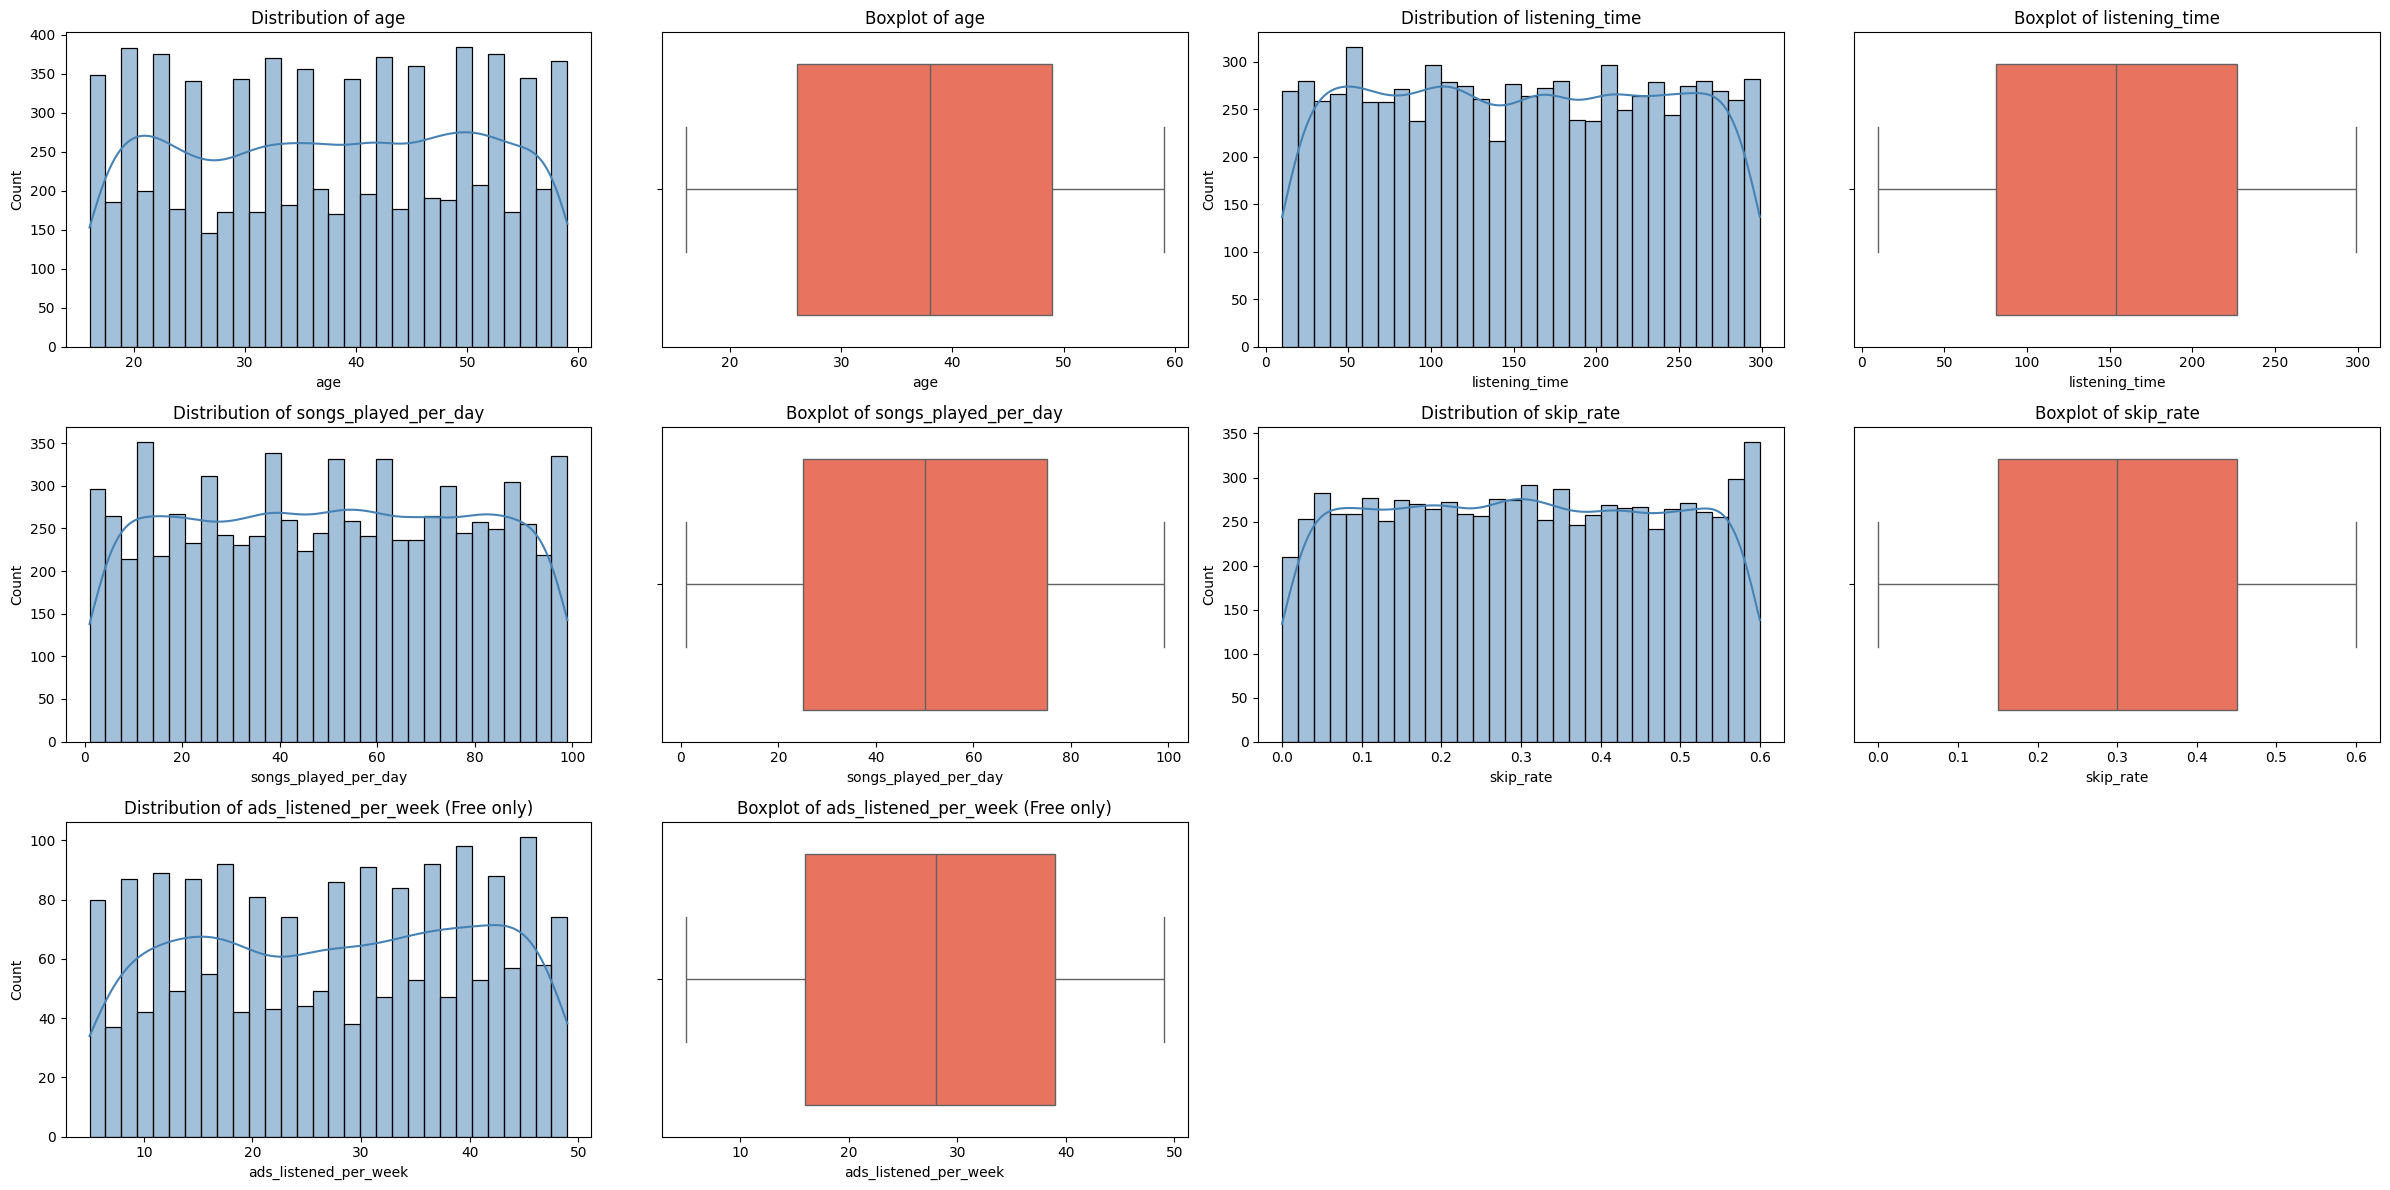

In [ ]:
ncols = 4
nrows = int(len(quantitative_cols) / 2) + (len(quantitative_cols) % 2 > 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 4*nrows))

axes = axes.reshape(nrows, ncols)

for i, col in enumerate(quantitative_cols):
    #row and position
    row = i // 2
    colpos = (i % 2) * 2

    if col == "ads_listened_per_week":
        series_pd = df.loc[df["subscription_type"] == "Free", col].dropna()
        title_suffix = " (Free only)"
    else:
        series_pd = df[col].dropna()
        title_suffix = ""

    # histogram
    sns.histplot(series_pd, kde=True, ax=axes[row][colpos], color="steelblue", bins=30)
    axes[row][colpos].set_title(f"Distribution of {col}{title_suffix}")

    #boxplot
    sns.boxplot(x=series_pd, ax=axes[row][colpos+1], color="tomato")
    axes[row][colpos+1].set_title(f"Boxplot of {col}{title_suffix}")

#Deletes empty subplots (odd number)
total_plots = len(quantitative_cols) * 2
for j in range(total_plots, nrows*ncols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [ ]:
# Variable analysis

correlations = {}

# Quantitative
for col in quantitative_cols:
    correlations[col] = df[col].corr(df["is_churned"])

# Booleanas
for col in boolean_cols:
    correlations[col] = df[col].astype(int).corr(df["is_churned"].astype(int))

# Categorics (one-hot)
df_dummies = pd.get_dummies(df[categorical_cols], drop_first=True)

for col in df_dummies.columns:
    correlations[col] = df_dummies[col].corr(df["is_churned"])

# Union all
correlations_df = pd.DataFrame({
    "variable": list(correlations.keys()),
    "corr_with_churn": list(correlations.values())
})

print(correlations_df.sort_values("corr_with_churn", key=abs, ascending=False).round(3))

                     variable  corr_with_churn
3                   skip_rate            0.016
18         device_type_Mobile            0.016
12                 country_PK            0.014
11                 country_IN           -0.014
19            device_type_Web           -0.013
15     subscription_type_Free           -0.013
5           offline_listening            0.013
9                  country_DE            0.012
16  subscription_type_Premium           -0.011
6                 gender_Male           -0.011
10                 country_FR            0.011
13                 country_UK           -0.010
2        songs_played_per_day            0.009
8                  country_CA           -0.009
1              listening_time           -0.008
7                gender_Other            0.005
14                 country_US           -0.004
0                         age            0.004
17  subscription_type_Student            0.004
4       ads_listened_per_week           -0.002


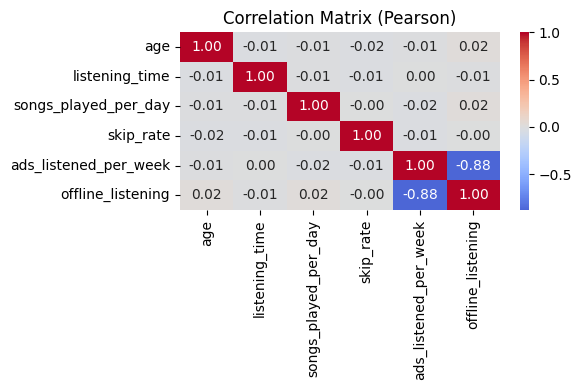

In [ ]:
#correlation matrix
corr_matrix = df[quantitative_cols + boolean_cols].corr(method="pearson")

plt.figure(figsize=(6,4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Correlation Matrix (Pearson)")
plt.tight_layout()
plt.show()


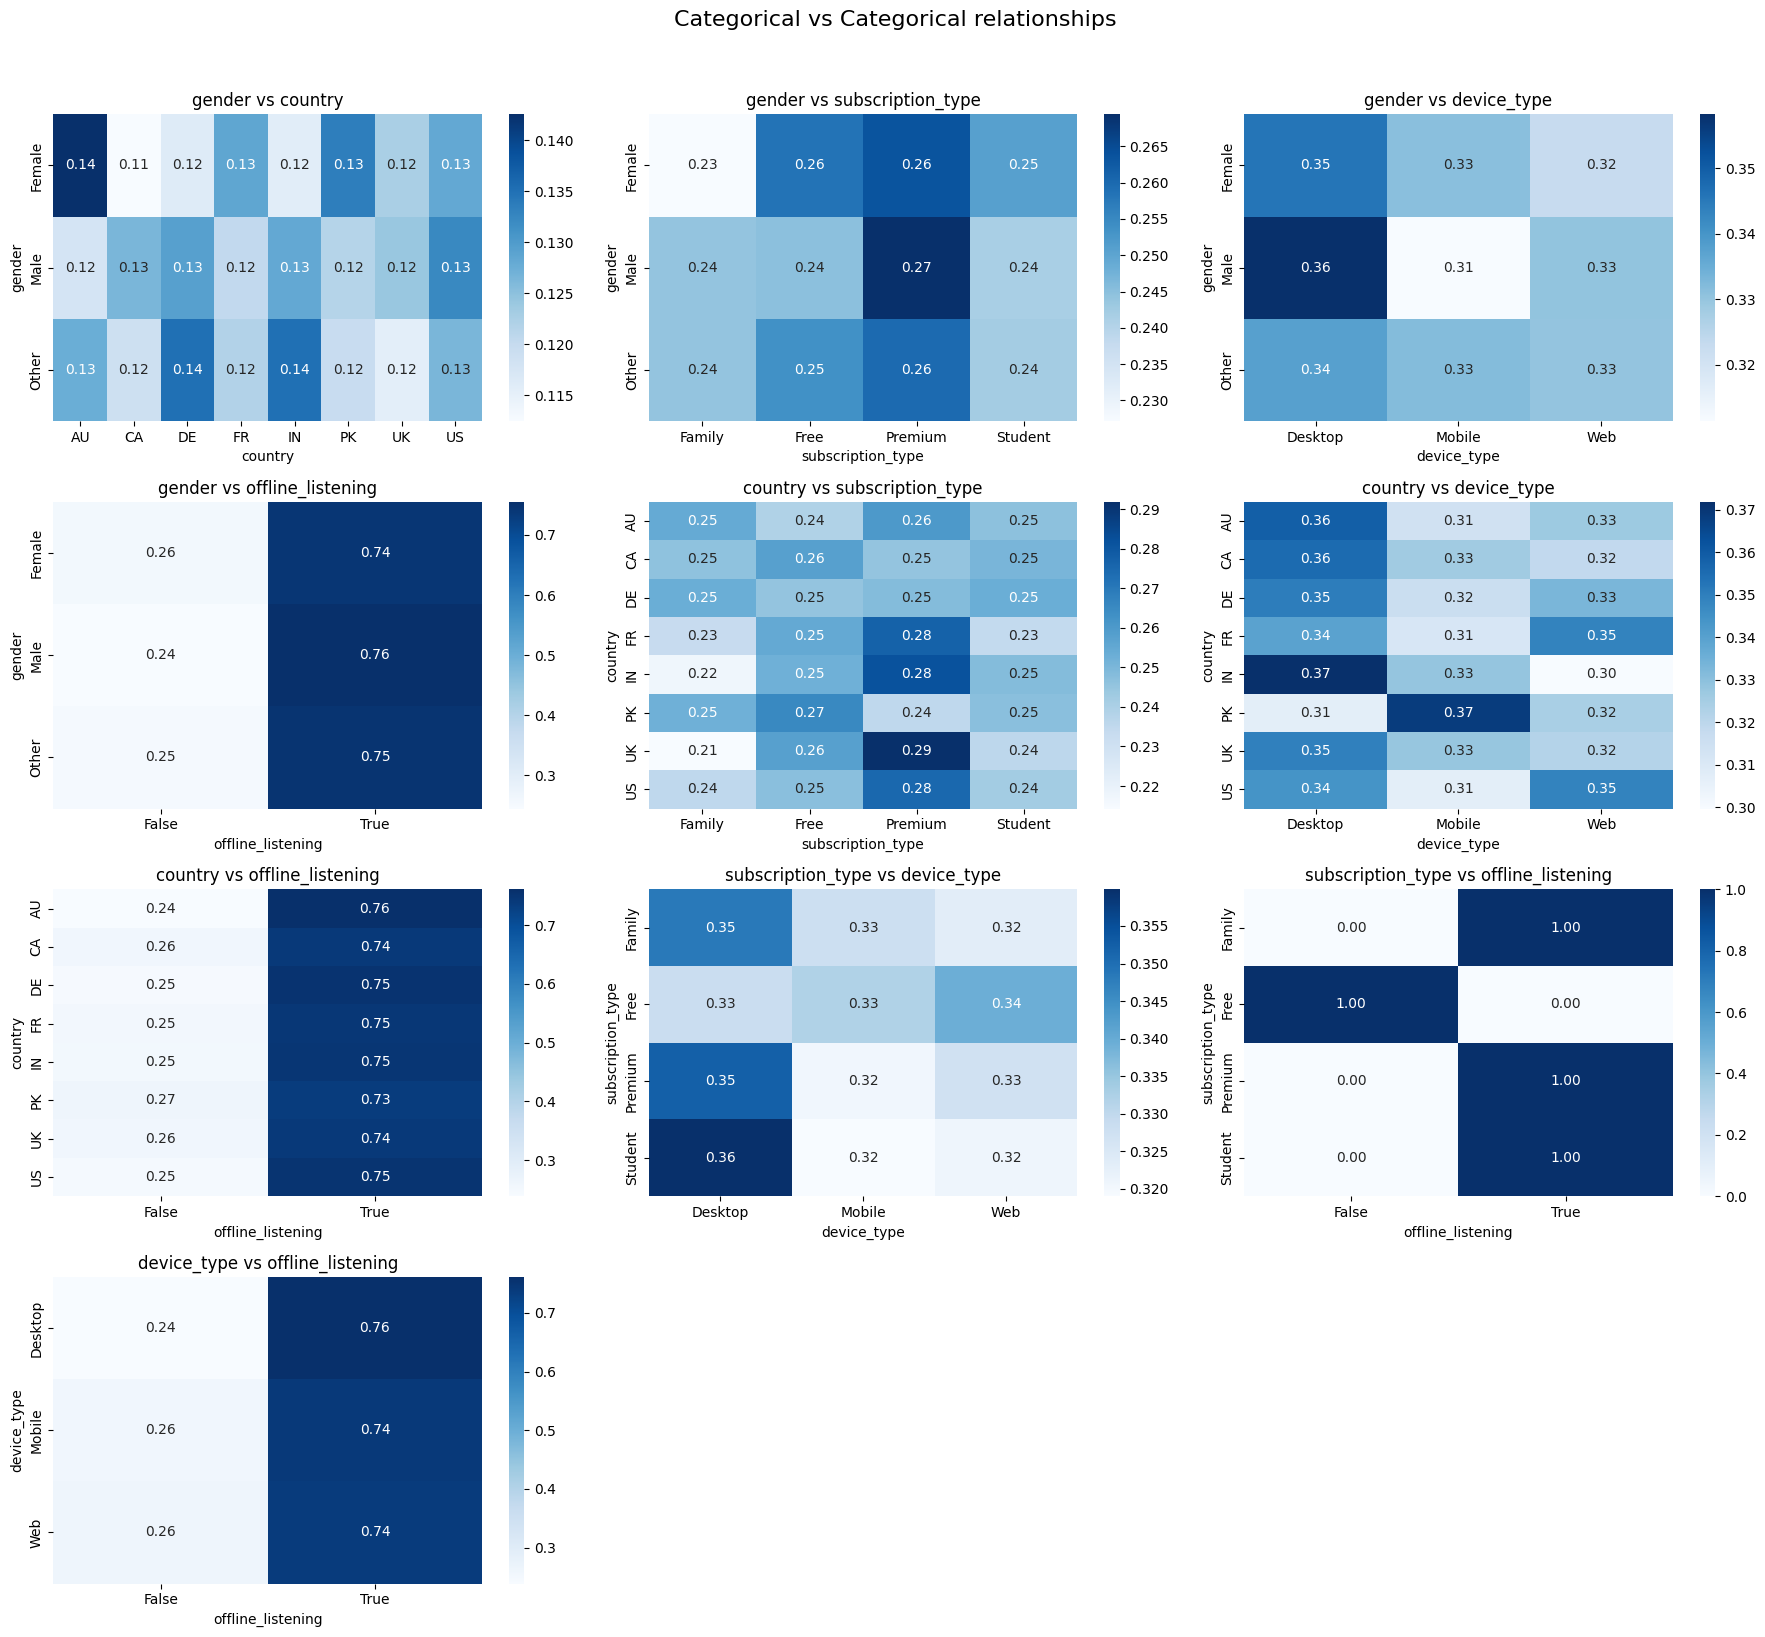

In [ ]:
import itertools

# Categorical
cat_features = [c for c in (categorical_cols + string_cols + boolean_cols) if c not in ["user_id"]]

# Combinations 2x2
pairs = list(itertools.combinations(cat_features, 2))

ncols = 3
nrows = int(len(pairs) / ncols) + (len(pairs) % ncols > 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 4*nrows))
axes = axes.flatten()

for i, (col1, col2) in enumerate(pairs):
    ctab = pd.crosstab(df[col1], df[col2], normalize="index")
    sns.heatmap(ctab, annot=True, cmap="Blues", fmt=".2f", ax=axes[i])
    axes[i].set_title(f"{col1} vs {col2}")
    axes[i].set_ylabel(col1)
    axes[i].set_xlabel(col2)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Categorical vs Categorical relationships", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


# Outliers

Only the users who listen on the free tier are exposed to ads.
Any kind of analysis for the ads will have to be done on the free tier users.

# Modelling strategies

* Supervised learning

# Classification algorithms used

* Decision tree
* Logistic regression
* k-nearest neighbors
* Random forest

# Model Evaluation

# Changes

* Added Random forest model
* Added k-means clustering model
* Added ROC AUC scores
* Added ROC AUC curves
* Added feature importance graph
* Display class imbalance

In [ ]:
from sklearn.preprocessing import StandardScaler
import warnings

# Makes it so that the qualitative data doesn't mess with model training

df_model = df.drop(columns=["user_id", "offline_listening"])
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)
scaler = StandardScaler()
df_model[quantitative_cols] = scaler.fit_transform(df_model[quantitative_cols])

warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split

# Train test split
# 80/20

X = df_model.drop('is_churned', axis=1)
y = df_model['is_churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (6400, 19)
Test shape: (1600, 19)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_text, DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
# Classification model training function

def train_class_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred, average='weighted')
  rec = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  if hasattr(model, "predict_proba"):
    y_probs = model.predict_proba(X_test)[:, 1]
  else:
    y_probs = model.decision_function(X_test)
  roc_auc = roc_auc_score(y_test, y_probs)

  print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
  print("Classification Report:\n", classification_report(y_test, y_pred))

  return{"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1,
         "ROC AUC" : roc_auc}


In [ ]:
# Decision tree
# Logistic regression
# k-nearest neighbors
# Random forest

dec_tree = DecisionTreeClassifier(random_state=42)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier()
rand_forest = RandomForestClassifier(random_state=42)

results_class = []

# Train classification models and collect the results

log_reg_metrics = train_class_model(log_reg, X_train, y_train, X_test, y_test)
log_reg_metrics["Model"] = "Logistic Regression"
results_class.append(log_reg_metrics)

dec_tree_metrics = train_class_model(dec_tree, X_train, y_train, X_test, y_test)
dec_tree_metrics["Model"] = "Decision Tree"
results_class.append(dec_tree_metrics)

knn_metrics = train_class_model(knn, X_train, y_train, X_test, y_test)
knn_metrics["Model"] = "k-Nearest Neighbors"
results_class.append(knn_metrics)

rand_forest_metrics = train_class_model(rand_forest, X_train, y_train, X_test,
                                        y_test)
rand_forest_metrics["Model"] = "Random Forest"
results_class.append(rand_forest_metrics)

# Displays confusion matrix and classification report

results_class

Confusion Matrix:
 [[1186    0]
 [ 414    0]]
Classification Report:
               precision    recall  f1-score   support

       False       0.74      1.00      0.85      1186
        True       0.00      0.00      0.00       414

    accuracy                           0.74      1600
   macro avg       0.37      0.50      0.43      1600
weighted avg       0.55      0.74      0.63      1600

Confusion Matrix:
 [[859 327]
 [292 122]]
Classification Report:
               precision    recall  f1-score   support

       False       0.75      0.72      0.74      1186
        True       0.27      0.29      0.28       414

    accuracy                           0.61      1600
   macro avg       0.51      0.51      0.51      1600
weighted avg       0.62      0.61      0.62      1600

Confusion Matrix:
 [[1043  143]
 [ 357   57]]
Classification Report:
               precision    recall  f1-score   support

       False       0.74      0.88      0.81      1186
        True       0.28      0.

[{'Accuracy': 0.74125,
  'Precision': 0.5494515624999999,
  'Recall': 0.74125,
  'F1': 0.631100143575018,
  'ROC AUC': np.float64(0.4959592997205725),
  'Model': 'Logistic Regression'},
 {'Accuracy': 0.613125,
  'Precision': 0.62350671392553,
  'Recall': 0.6131249999999999,
  'F1': 0.6180730797473859,
  'ROC AUC': np.float64(0.5094846477829101),
  'Model': 'Decision Tree'},
 {'Accuracy': 0.6875,
  'Precision': 0.6259750000000001,
  'Recall': 0.6875,
  'F1': 0.6459717320273787,
  'ROC AUC': np.float64(0.5271189236747562),
  'Model': 'k-Nearest Neighbors'},
 {'Accuracy': 0.735,
  'Precision': 0.5974337121212121,
  'Recall': 0.735,
  'F1': 0.6313983712534632,
  'ROC AUC': np.float64(0.5286535343907585),
  'Model': 'Random Forest'}]

In [ ]:
# Classification model results
# Recall = the ability of a model to find true positives
# F1 = balance between precision and recall

results_class_df = pd.DataFrame(results_class)
results_class_df = results_class_df[["Model", "Accuracy", "Precision", "Recall", "F1", "ROC AUC"]]
results_class_df

,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Logistic Regression,0.741250,0.549452,0.741250,0.631100,0.495959
1,Decision Tree,0.613125,0.623507,0.613125,0.618073,0.509485
2,k-Nearest Neighbors,0.687500,0.625975,0.687500,0.645972,0.527119
3,Random Forest,0.735000,0.597434,0.735000,0.631398,0.528654


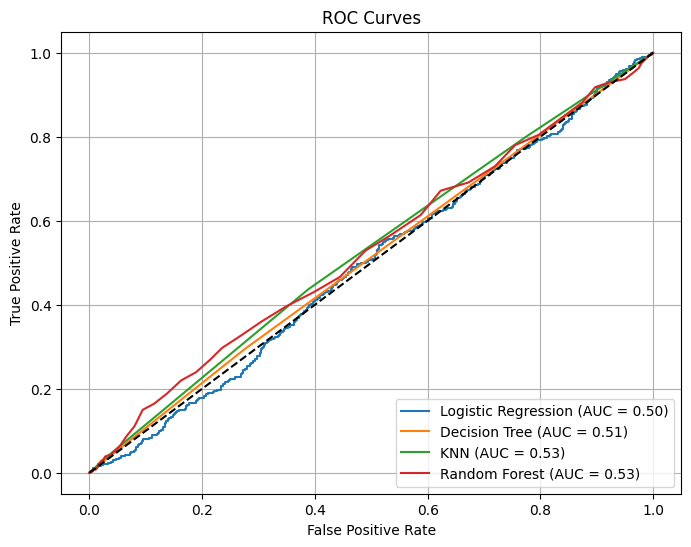

In [ ]:
from sklearn.metrics import roc_curve

# ROC Curve
# Higher values means better
# Values are rounded on the graph but random forest did the best
# All values hover over 0.5 though

plt.figure(figsize=(8, 6))

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dec_tree,
    "KNN": knn,
    "Random Forest": rand_forest
}

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# Class imbalance
# 74% did not churn
# 26% churned

# So models are biased towards non-churners

print(y.value_counts(normalize=True))

is_churned
False    0.741125
True     0.258875
Name: proportion, dtype: float64


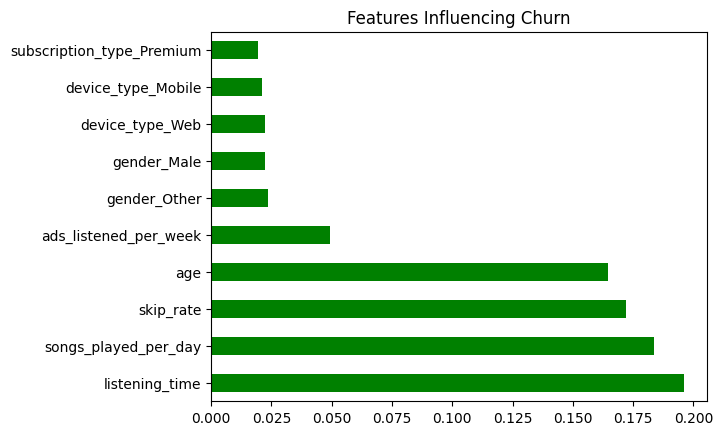

In [ ]:
# Feature importance according to random forest
# Decision tree shows mostly the same results

# Shows that the numerical categories are the most important
# when predicting churn.

importances = rand_forest.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='green')
plt.title("Features Influencing Churn")
plt.show()


In [ ]:
# Unsupervised learning model:
# k-means clustering

from sklearn.cluster import KMeans

# Add most important features from above
features = ['skip_rate', 'songs_played_per_day', 'age',
          'listening_time']

X = df[features]
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
cluster_summary = df.groupby('cluster')[features].mean()
cluster_summary


,skip_rate,songs_played_per_day,age,listening_time
cluster,,,,
0,0.440871,46.190332,25.464250,150.050352
1,0.156979,23.604187,39.378365,160.149551
2,0.161377,77.593970,36.094472,156.455276
3,0.440738,53.281467,49.506442,149.623389


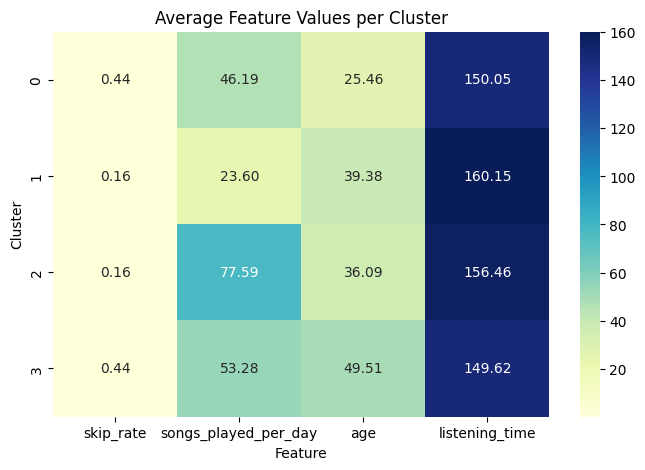

In [ ]:
# Model is skewed heavily towards listening time for some reason

plt.figure(figsize=(8, 5))
sns.heatmap(cluster_summary, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Average Feature Values per Cluster")
plt.ylabel("Cluster")
plt.xlabel("Feature")
plt.show()



**Final Insights**

Our analysis explored a Spotify churn dataset, initially confirming no missing values and providing descriptive statistics for various user attributes. Exploratory Data Analysis or EDA revealed insights into the distribution of numerical features and the composition of categorical variables like gender, country, subscription type, and device type. Correlation analysis with the is_churned target variable indicated generally low individual correlations, with skip_rate and device_type_Mobile showing the highest, albeit still weak, association with churn.

We used several supervised classification models, including Logistic Regression, Decision Tree, K-Nearest Neighbors, and Random Forest, that we trained to predict user churn. Despite varying performance metrics, all models struggled significantly with accurately identifying churners, as evidenced by low precision and recall for the positive class and ROC AUC scores hovering around 0.5. This performance is likely attributed to the pronounced class imbalance in the dataset, where non-churners far outnumber churners with approximately 74% vs. 26%. The Random Forest model, while still performing modestly, did provide insights into feature importance, highlighting numerical attributes like skip_rate, songs_played_per_day, age, and listening_time as the most influential factors in its predictions.

Furthermore, we applied an unsupervised k-means clustering approach to segment users based on key numerical features (skip_rate, songs_played_per_day, age, listening_time). This revealed distinct user groups with varying characteristics across these metrics, suggesting different behavioral patterns among the user base. While the predictive models for churn demonstrated limited effectiveness due to data imbalance and potentially insufficient predictive power of the current features, the clustering results offer a valuable avenue for understanding user segments, which could inform targeted retention strategies. Future work might focus on addressing class imbalance through techniques like oversampling or undersampling, exploring more complex models, or engineering new features to improve churn prediction accuracy.